___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [69]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [70]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [73]:
df.duplicated().sum().any()

False

In [74]:
df.isnull().sum().any()

False

In [75]:
df['CustomerID'].nunique()

200

In [76]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [77]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [78]:
# ax = sns.countplot(df['Gender'])
# ax.bar_label(ax.containers[0]);

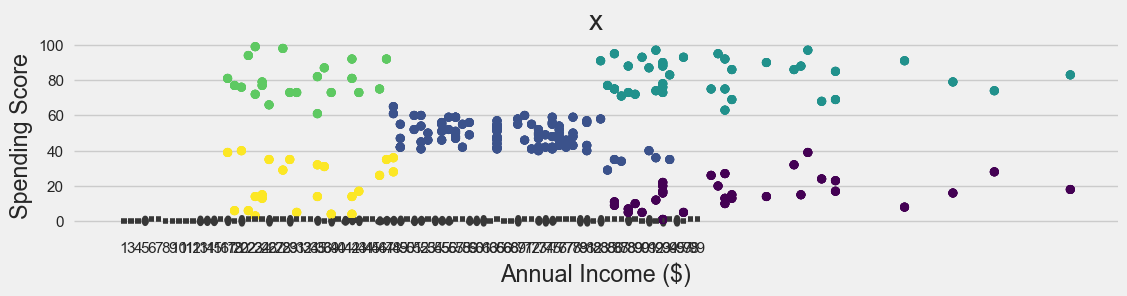

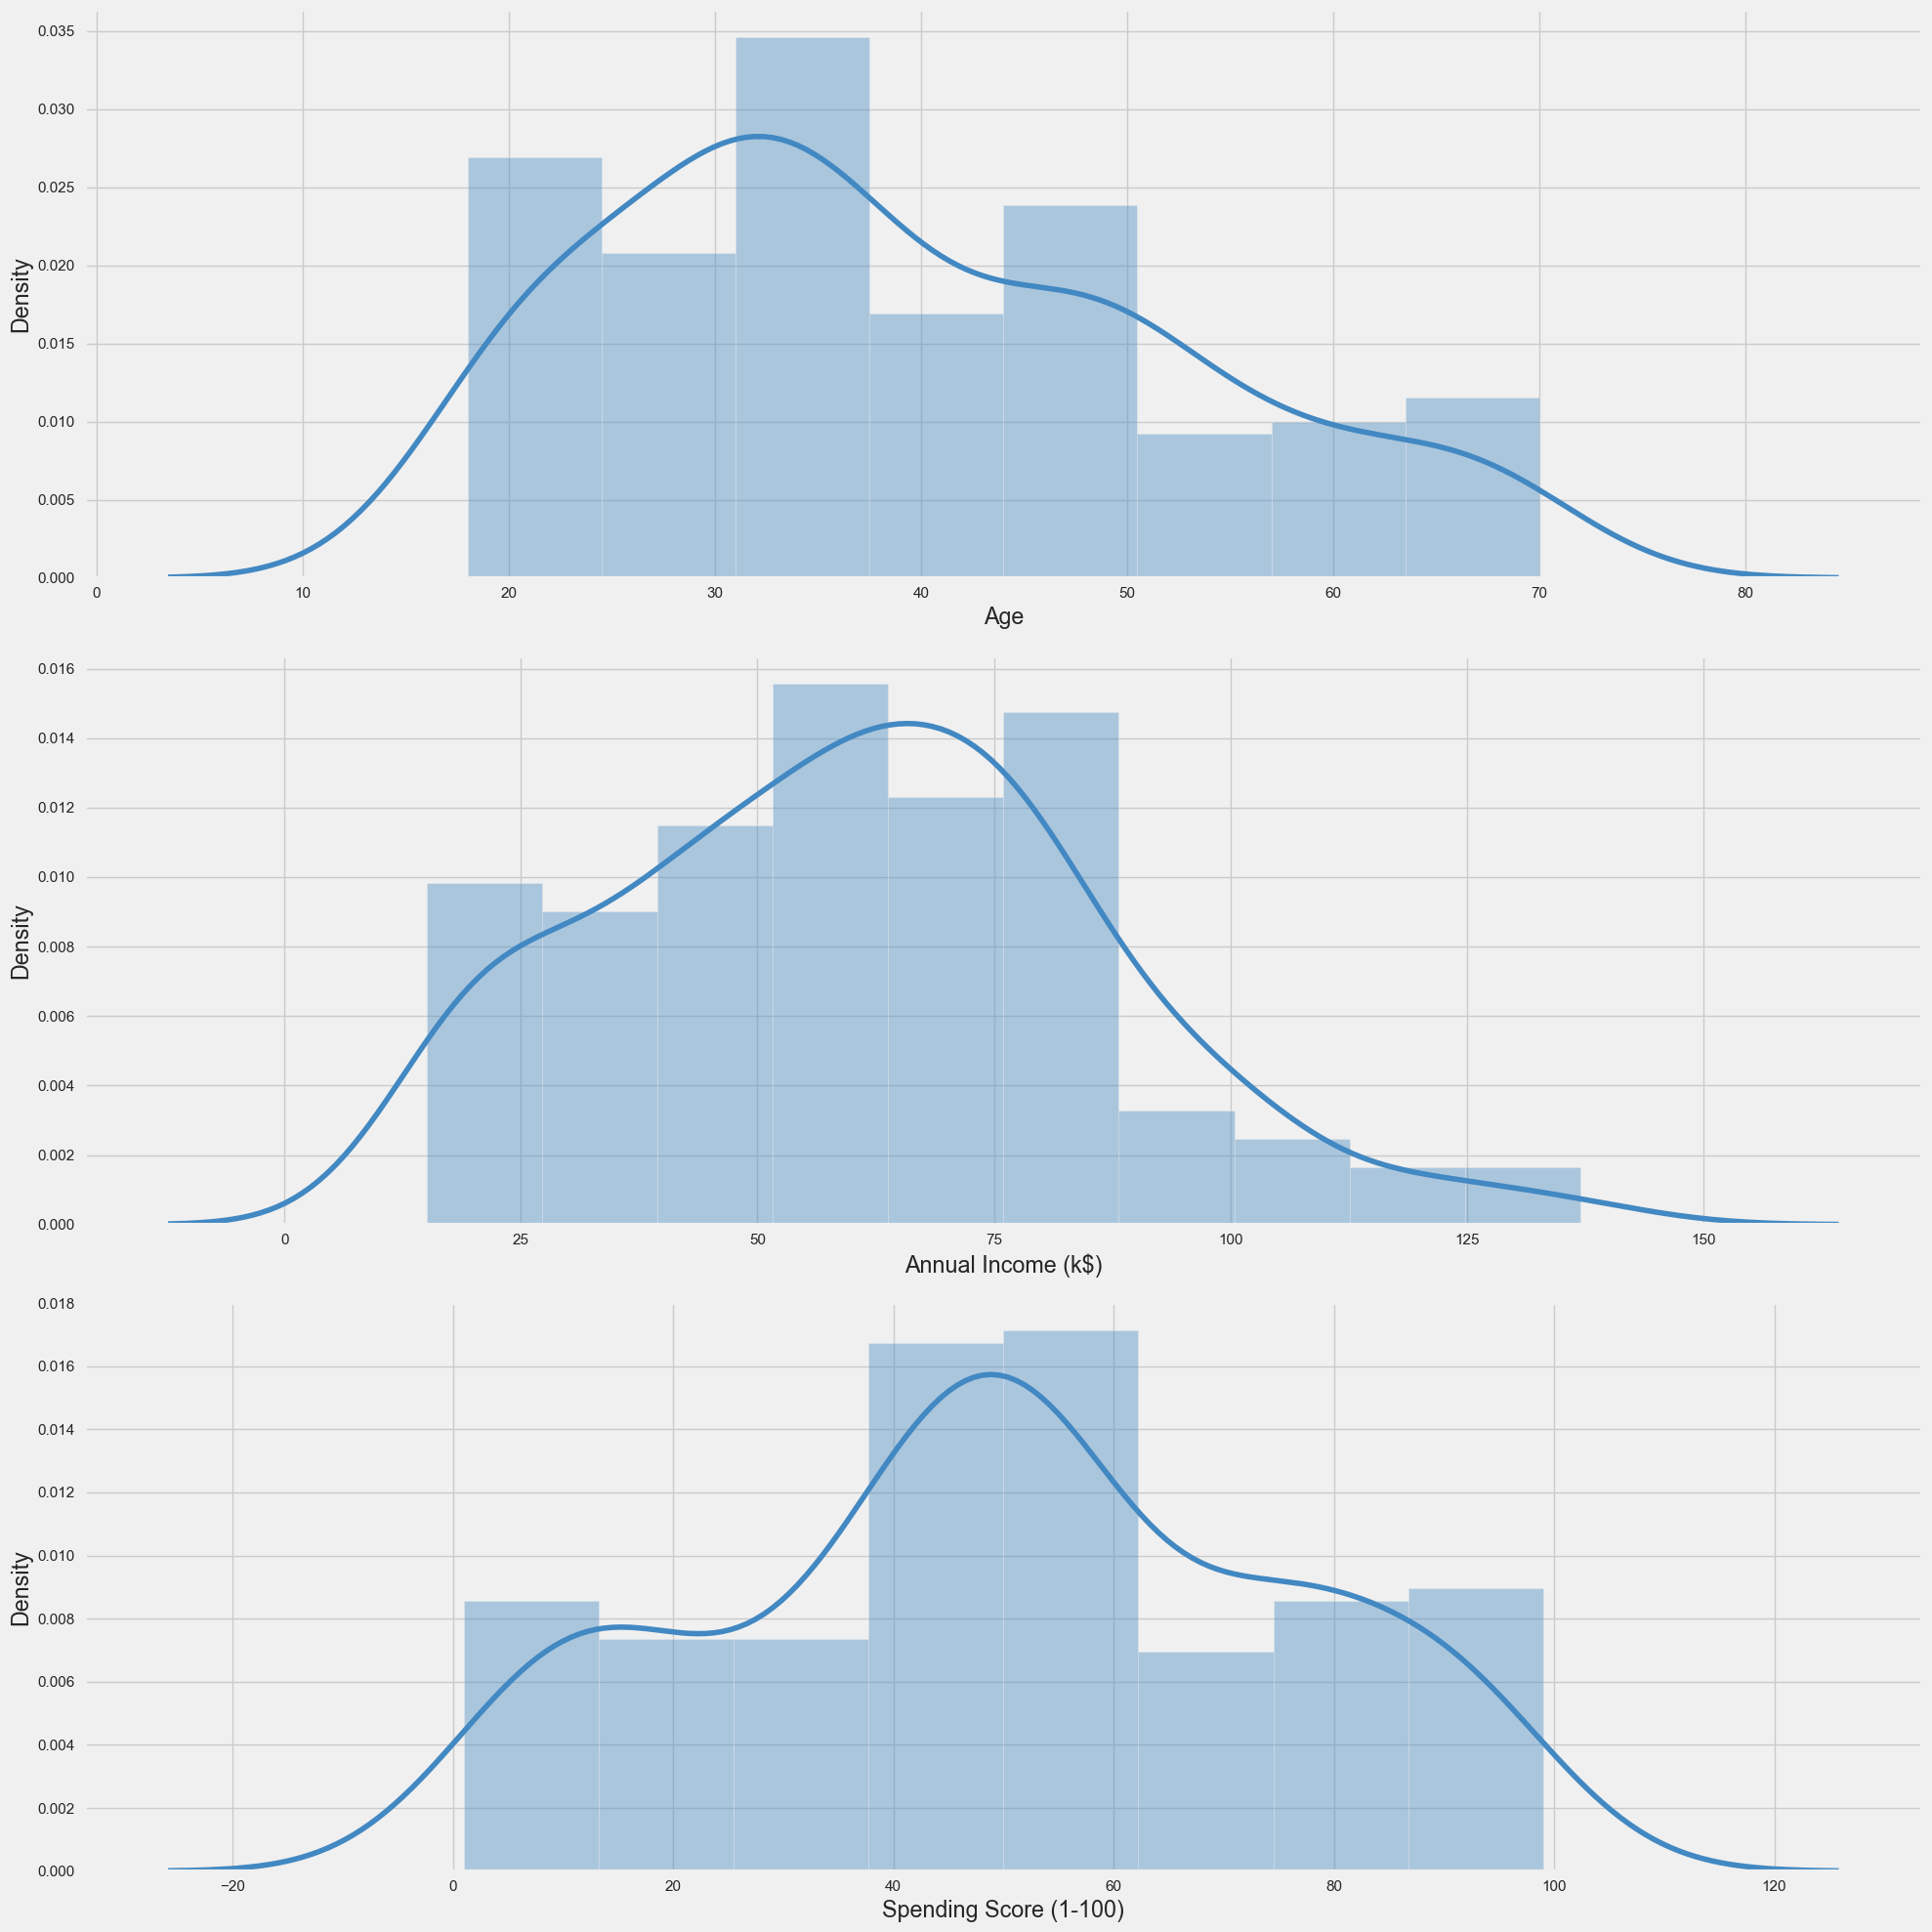

In [79]:
plt.figure(figsize = (20, 20))
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

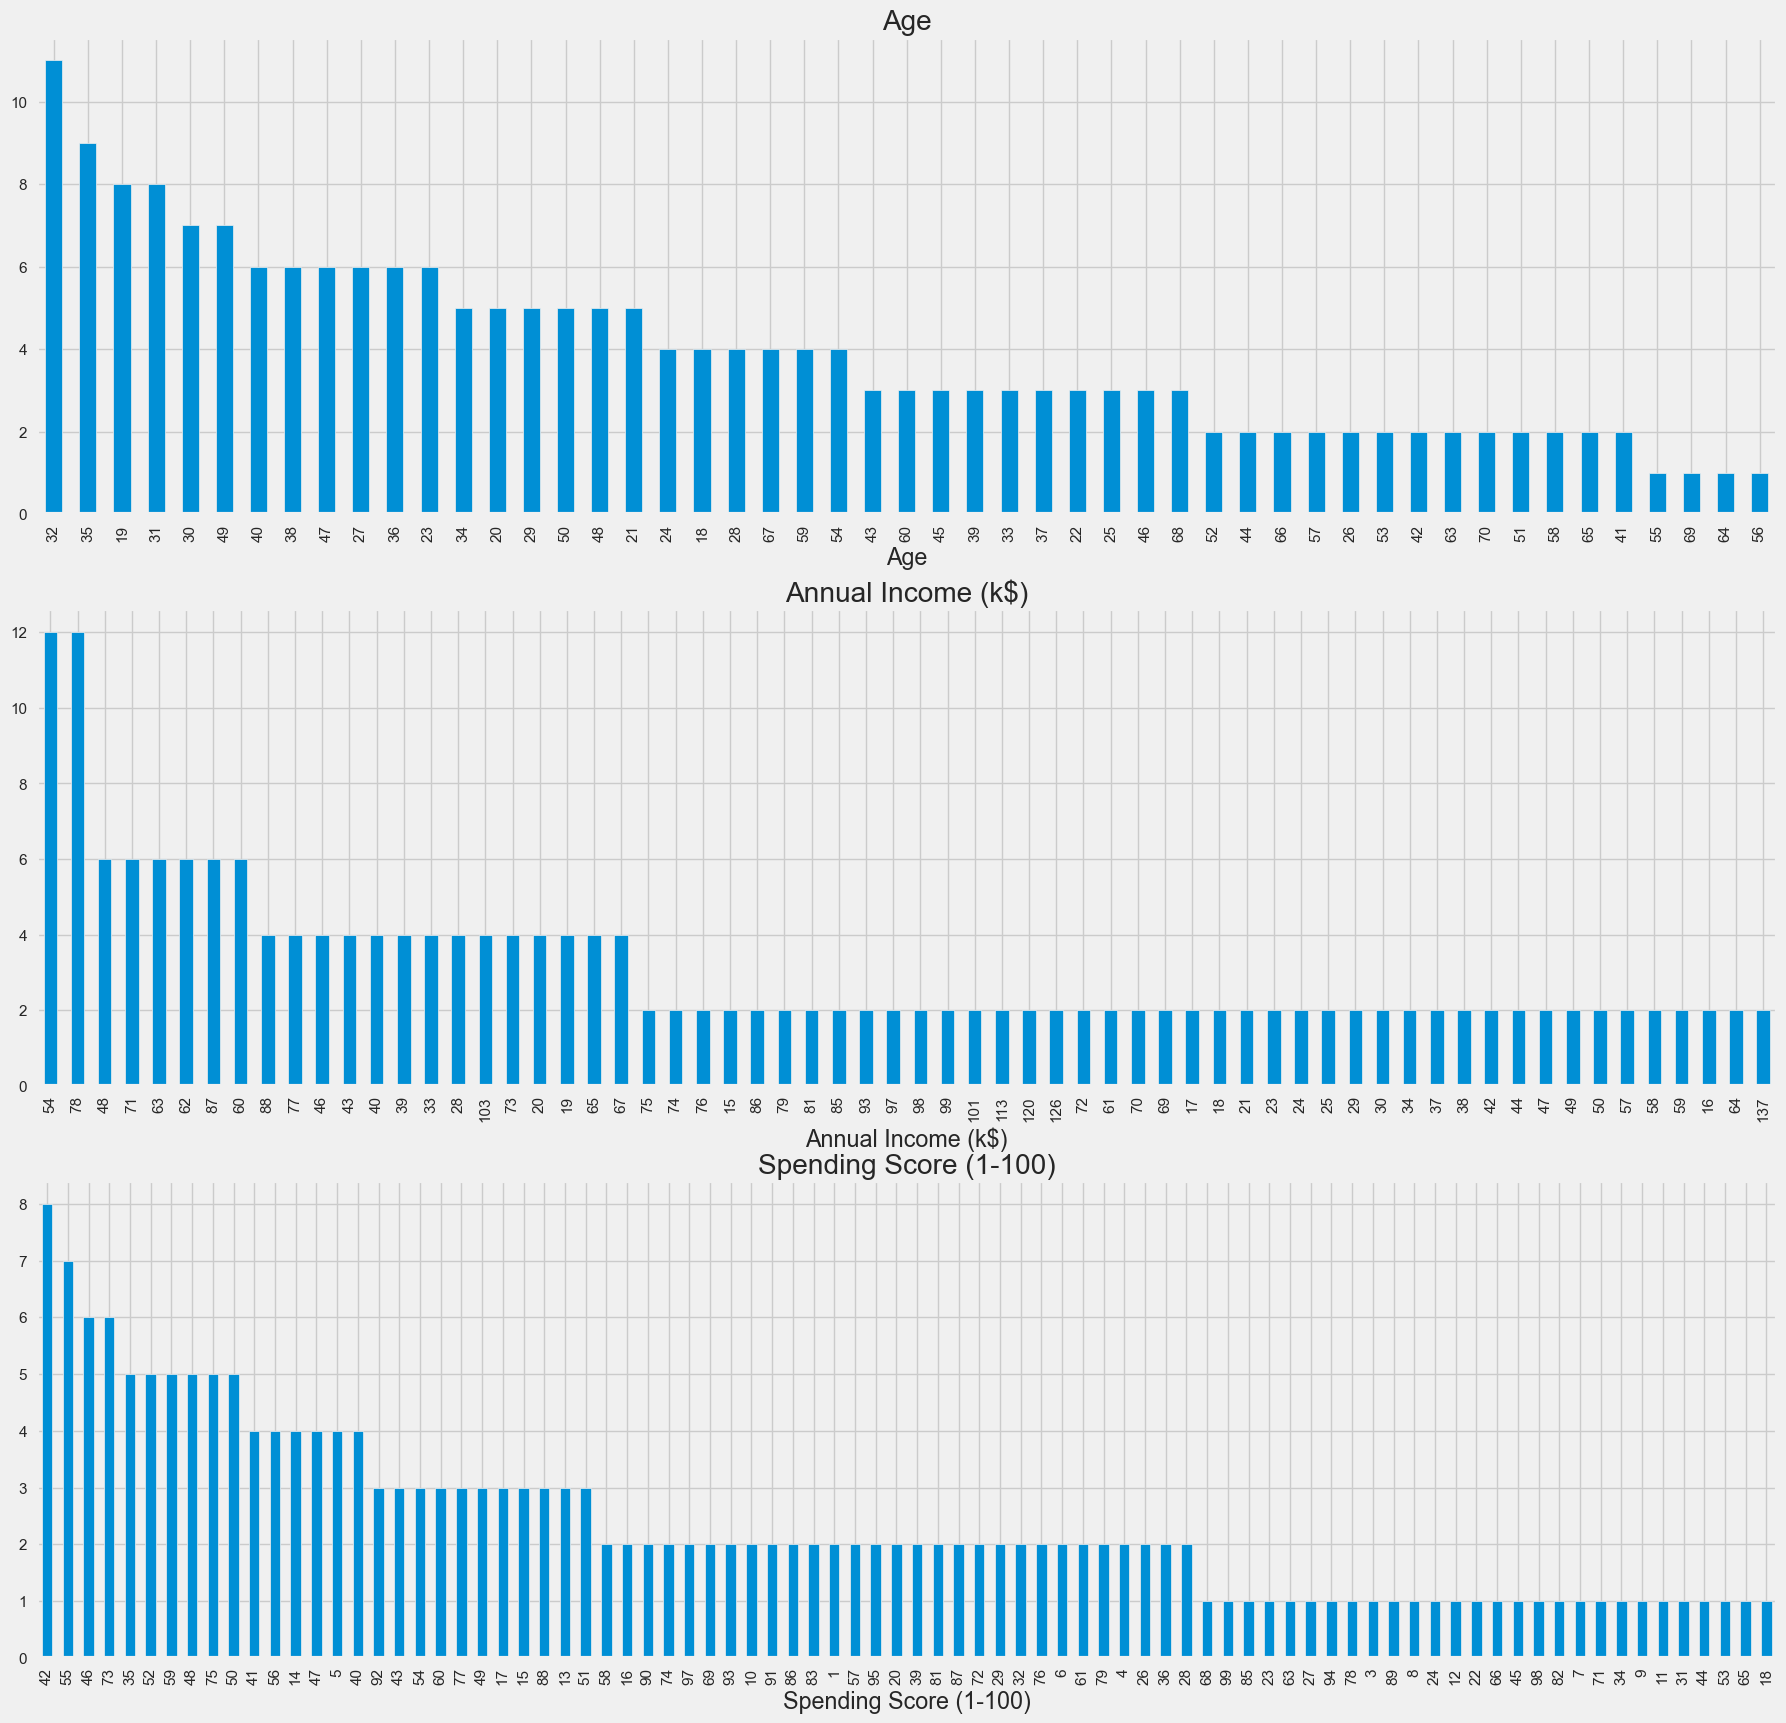

In [80]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
      plt.subplot(3, 1, i+1)
      plt.title(column[i])
      df[column[i]].value_counts().plot.bar(figsize = (20, 20))

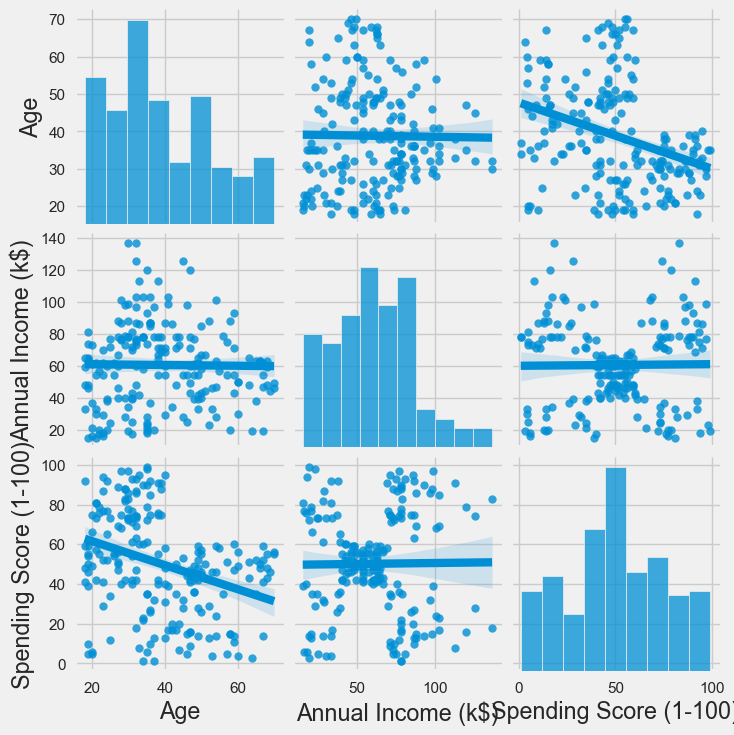

In [81]:
sns.pairplot(df, kind="reg")

<Axes: >

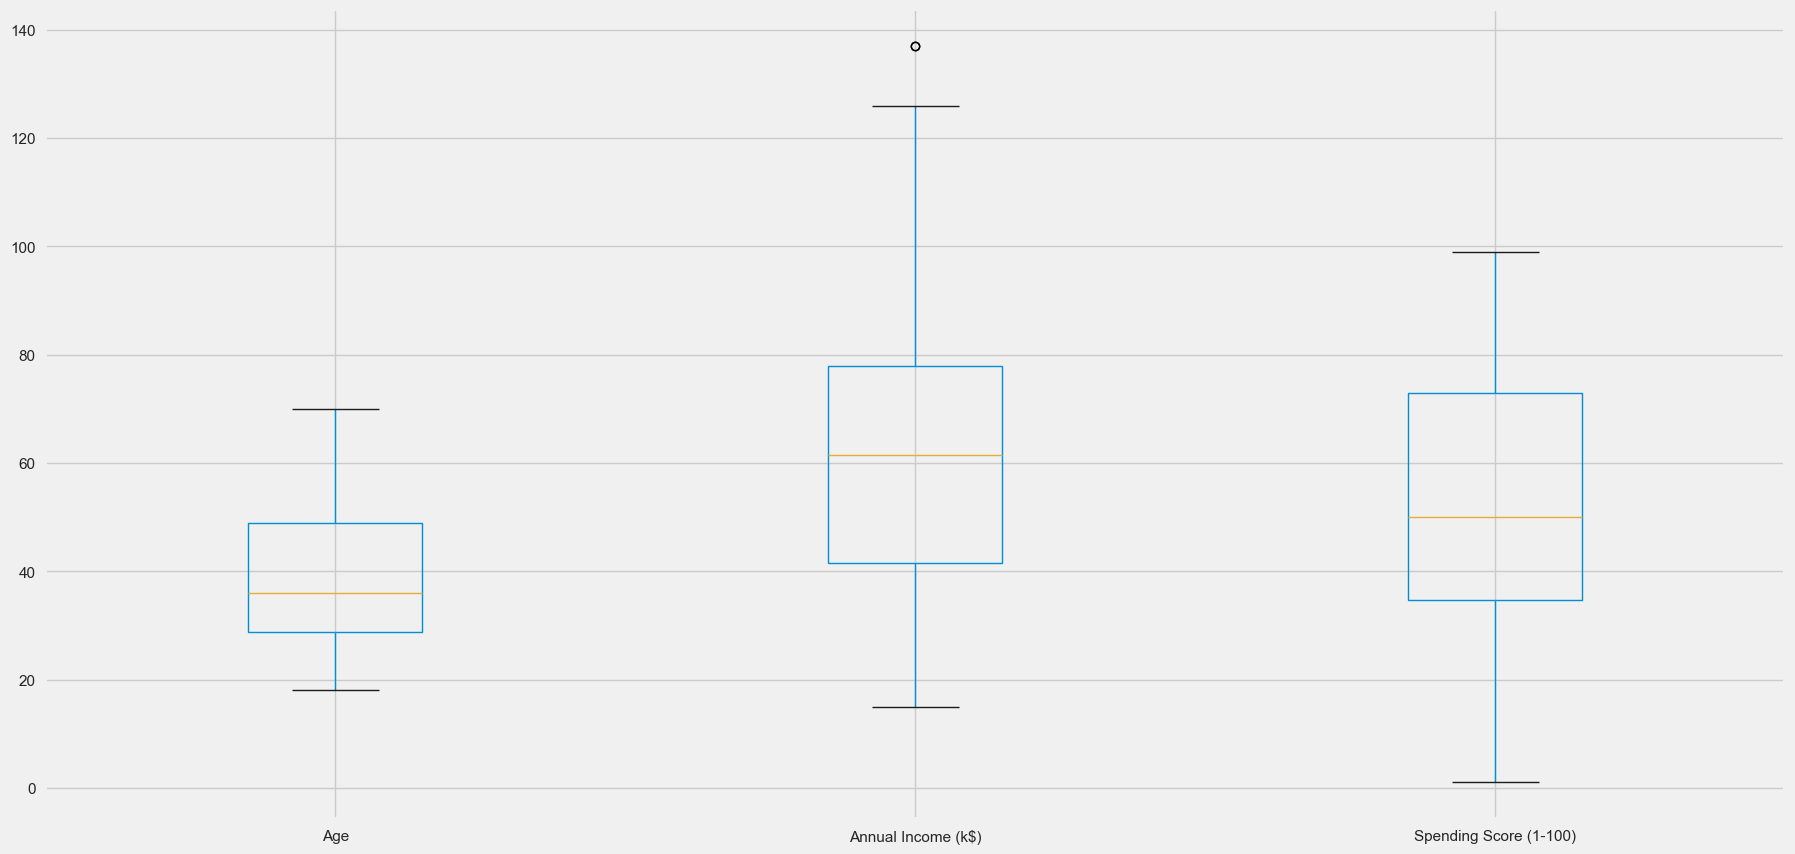

In [82]:
plt.figure(figsize =(20,10))
df.boxplot()

<Axes: >

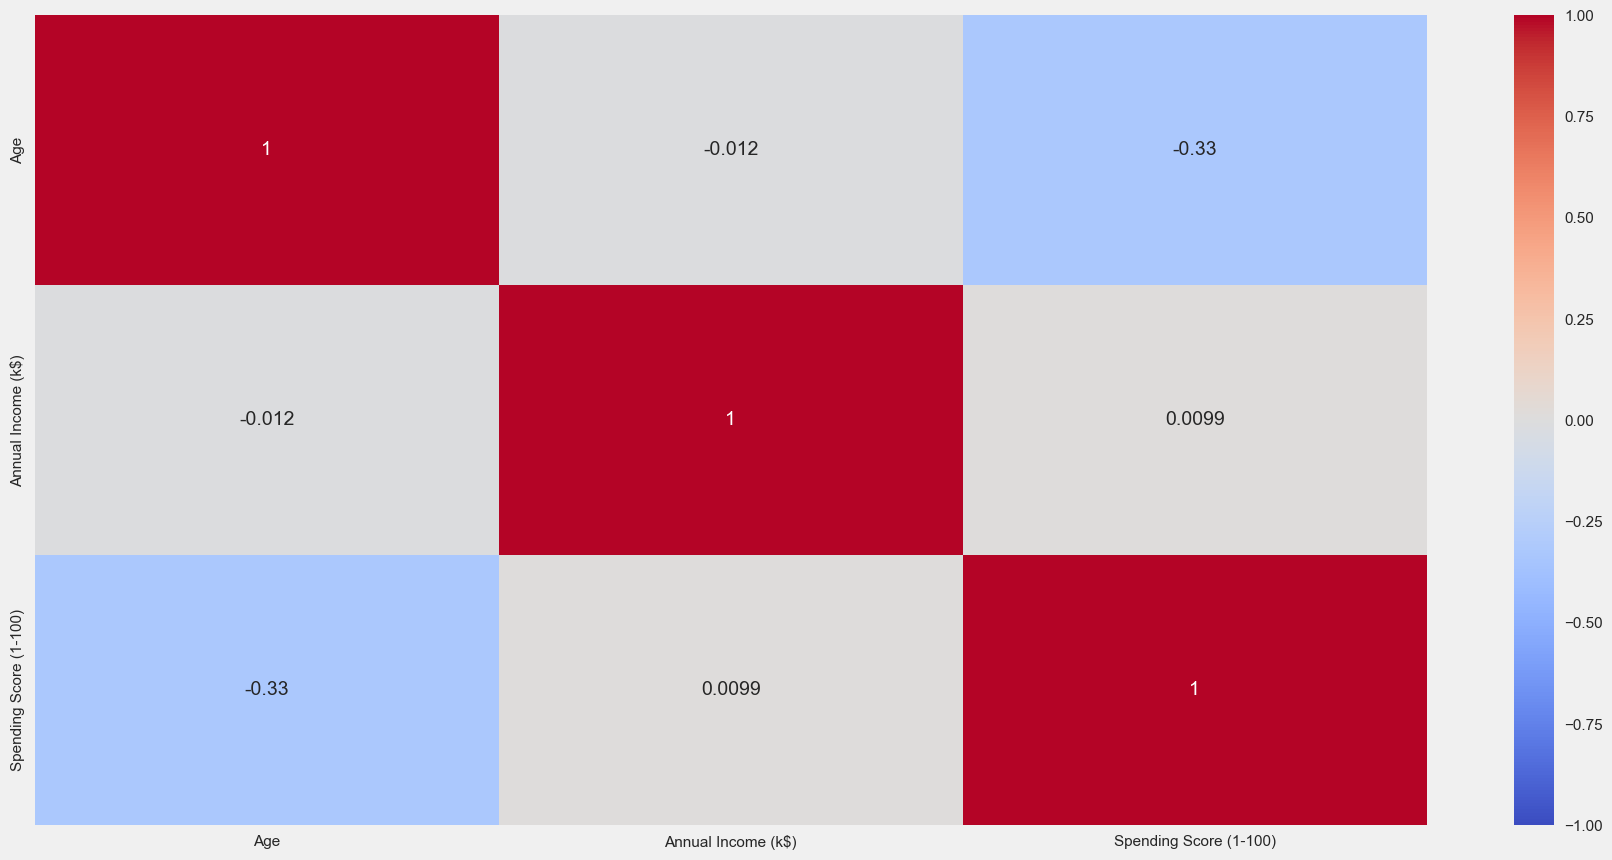

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot = True, vmin=-1, vmax=1, cmap="coolwarm")

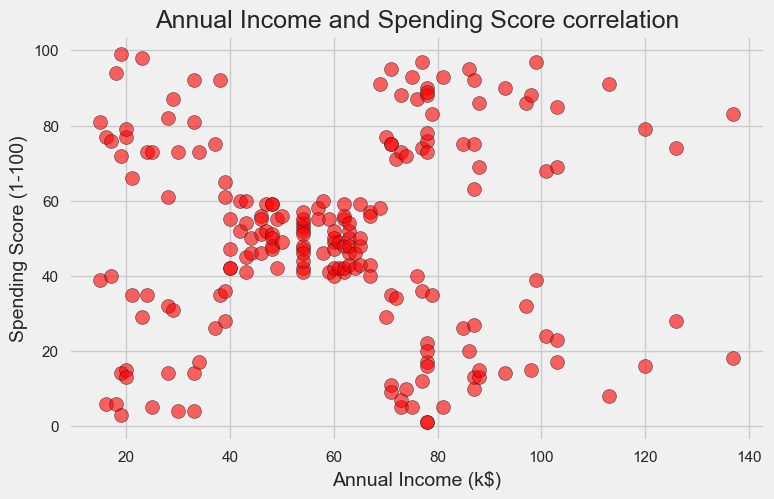

In [84]:
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

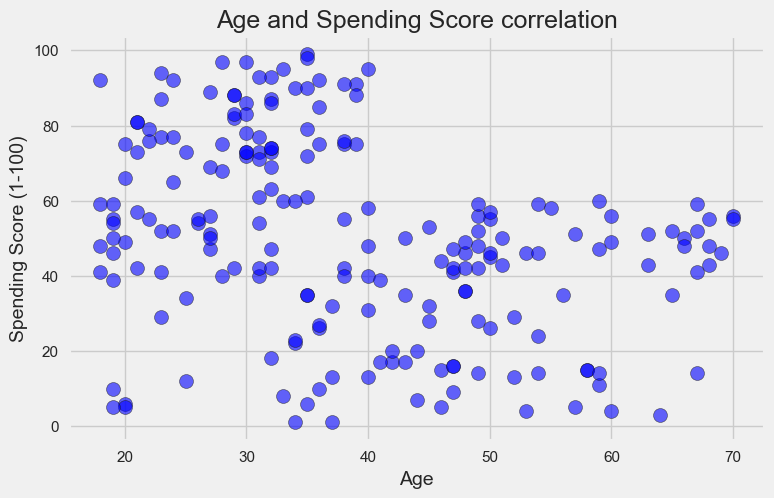

In [85]:
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

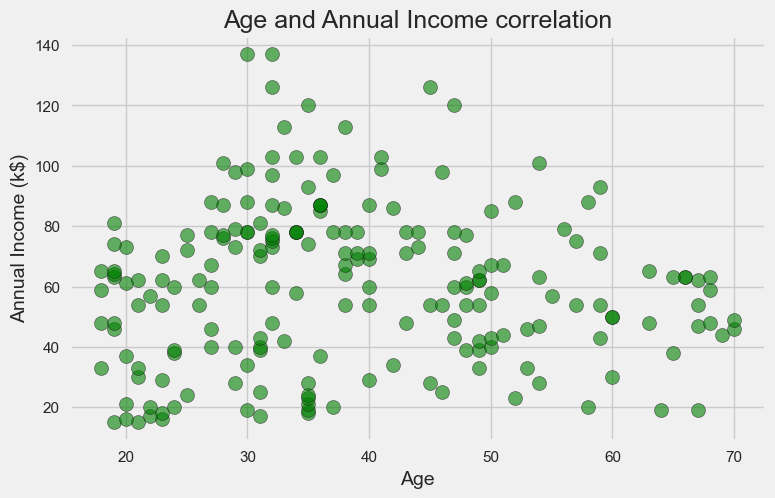

In [86]:
plt.figure(figsize=(8,5))
plt.title("Age and Annual Income correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='green',edgecolor='k',alpha=0.6, s=100)
plt.show()

In [87]:
# Define the mapping dictionary
mapping = {'Male': 0, 'Female': 1}

# Map the categorical column to 0s and 1s
df['Gender'] = df['Gender'].map(mapping)

# Print the mapped column
print(df['Gender'])

0      0
1      0
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      1
10     0
11     1
12     1
13     1
14     0
15     0
16     1
17     0
18     0
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     1
29     1
30     0
31     1
32     0
33     0
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     0
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     0
52     1
53     0
54     1
55     0
56     1
57     0
58     1
59     0
60     0
61     0
62     1
63     1
64     0
65     0
66     1
67     1
68     0
69     1
70     0
71     1
72     1
73     1
74     0
75     0
76     1
77     0
78     1
79     1
80     0
81     0
82     0
83     1
84     1
85     0
86     1
87     1
88     1
89     1
90     1
91     0
92     0
93     1
94     1
95     0
96     1
97     1
98     0
99     0
100    1
101    1
102    0
103    0
104    0
105    1
106    1
107    0
108    0
109    0
110    0
1

In [88]:
df['Gender']

0      0
1      0
2      1
3      1
4      1
5      1
6      1
7      1
8      0
9      1
10     0
11     1
12     1
13     1
14     0
15     0
16     1
17     0
18     0
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     1
29     1
30     0
31     1
32     0
33     0
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     0
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     0
52     1
53     0
54     1
55     0
56     1
57     0
58     1
59     0
60     0
61     0
62     1
63     1
64     0
65     0
66     1
67     1
68     0
69     1
70     0
71     1
72     1
73     1
74     0
75     0
76     1
77     0
78     1
79     1
80     0
81     0
82     0
83     1
84     1
85     0
86     1
87     1
88     1
89     1
90     1
91     0
92     0
93     1
94     1
95     0
96     1
97     1
98     0
99     0
100    1
101    1
102    0
103    0
104    0
105    1
106    1
107    0
108    0
109    0
110    0
1

# Conclusion of EDA … 
- It seems there are no high correlations between the variables 
- Scaling seems unnecessary 
- Balanced data 
- Based on the data: customers can be segmented into 2-5 clusters

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [89]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [90]:
X = df.copy()

In [91]:
hopkins(X, 0.1)

0.7301731809344665

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Clustering based on Age and Spending Score- x1

In [93]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [94]:
X1 = df[["Age", 'Spending Score (1-100)']]
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6
7,23,94
8,64,3
9,30,72


## Since we got a value more than 0.5 we can continue with Clustering

In [95]:
hopkins(X1, 0.1)

0.7721735654131159

In [96]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

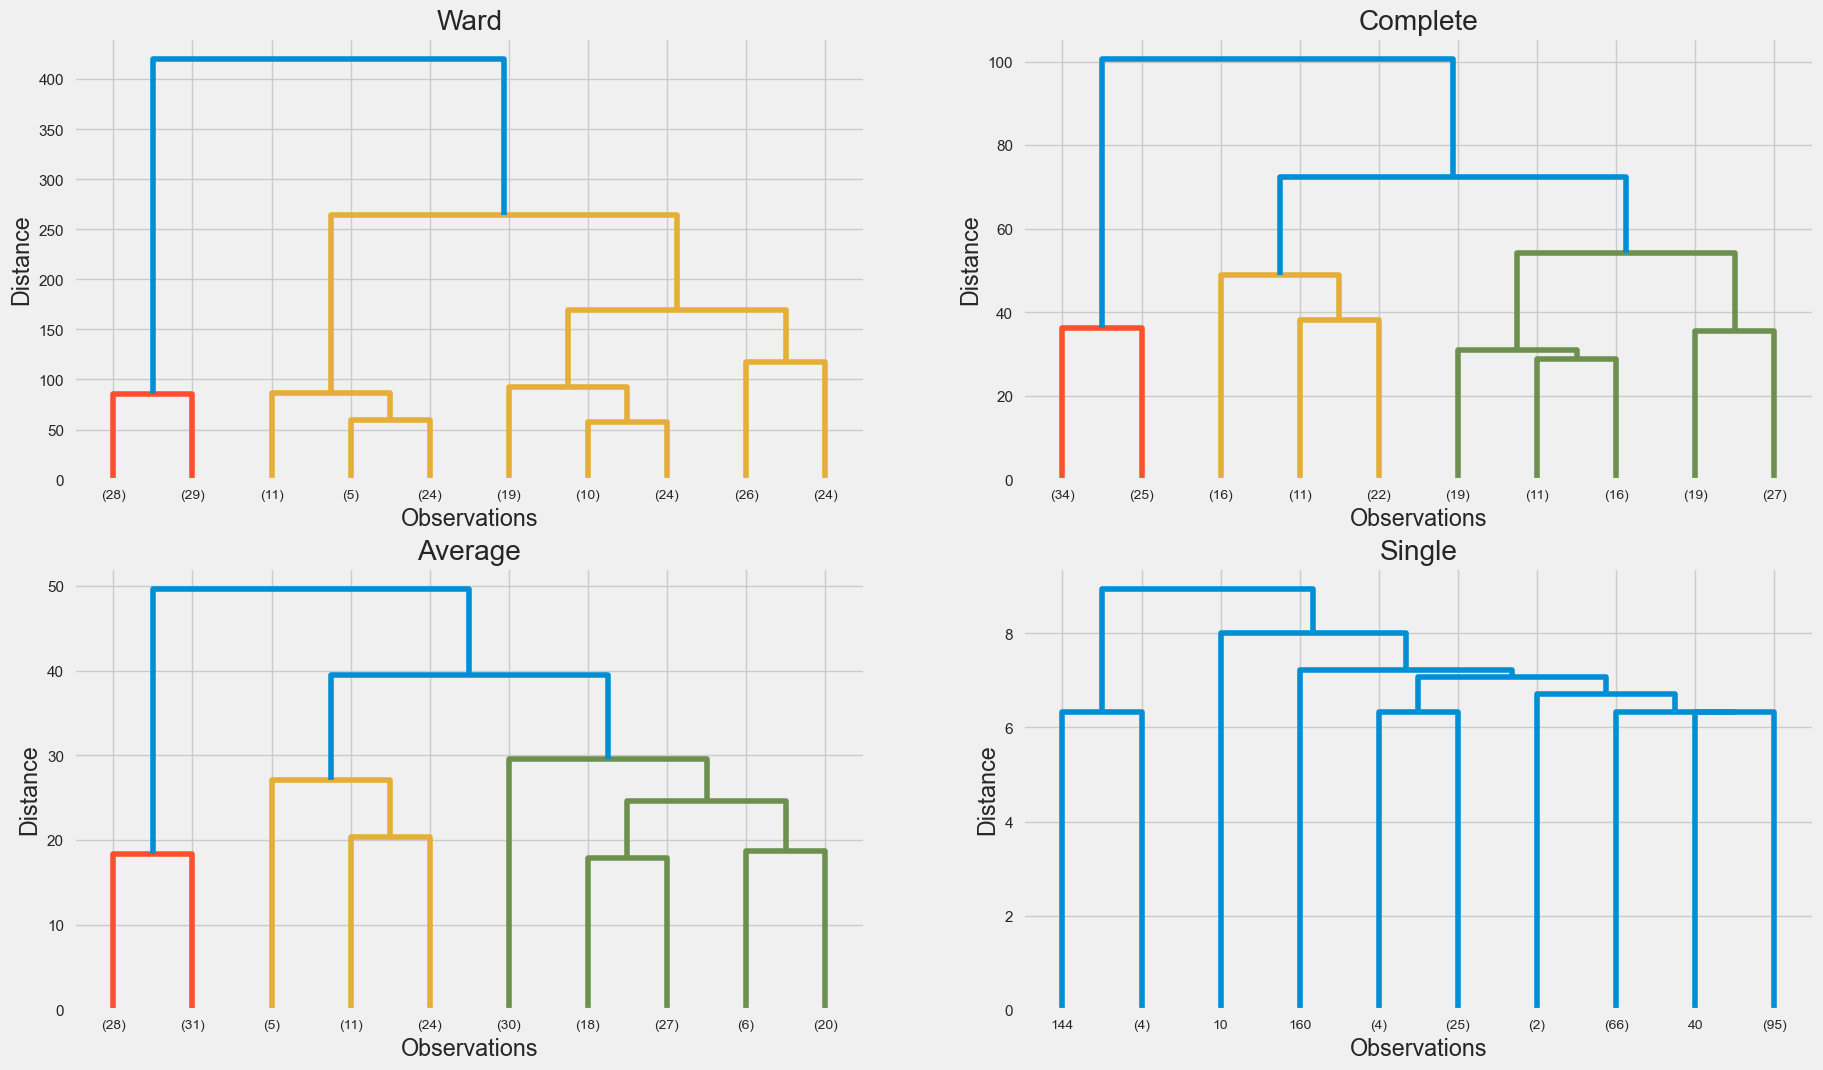

In [97]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);



## We have determend that we will use 3 clusters using ward method.

## Clustering based on Annual Income and Spending Score- x2

In [98]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X2
# df_3.reset_index()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [99]:
hopkins(X2, 0.1)

0.6938305995105926

## Since we got a value more than 0.5 we can continue with Clustering

In [100]:
hc_ward2 = linkage(y=X2, method="ward")
hc_complete2 = linkage(X2, "complete")
hc_average2 = linkage(X2, "average")
hc_single2 = linkage(X2, "single")

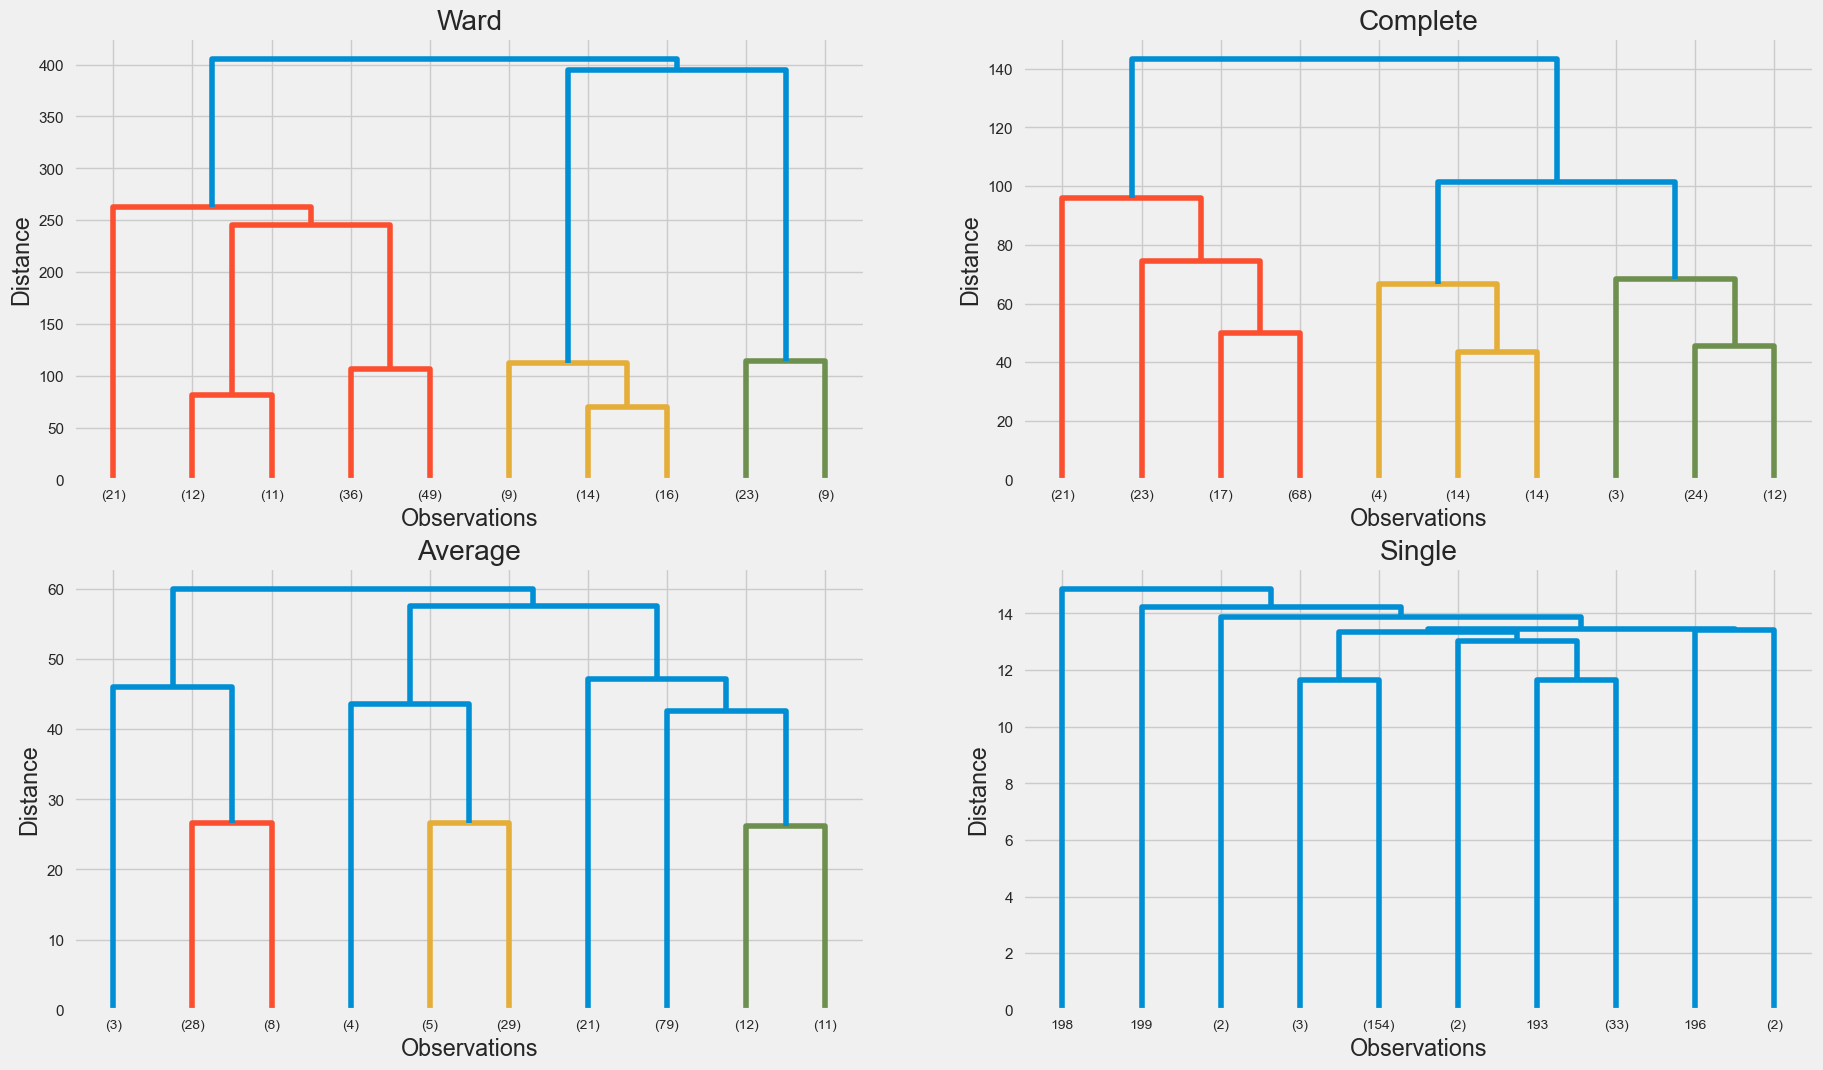

In [101]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single2, leaf_font_size = 10, truncate_mode='lastp', p=10);

## We have determend that we will use 3 clusters using ward method.

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [102]:
from sklearn.cluster import AgglomerativeClustering

In [162]:
model =  AgglomerativeClustering(n_clusters=3,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_x1 = model.fit_predict(X1)

In [163]:
model.labels_

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1], dtype=int64)

In [164]:
clusters = model.fit_predict(X1)
X1["clusters"] = clusters
X1

,Age,Spending Score (1-100),clusters_x1,clusters
0,19,39,0,0
1,21,81,3,1
2,20,6,2,2
3,23,77,3,1
4,31,40,0,0
5,22,76,3,1
6,35,6,2,2
7,23,94,3,1
8,64,3,2,2
9,30,72,3,1


#### Annual Income and Spending Score- x2

In [155]:
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.366818506927653
Silhouette Score for 3 clusters: 0.4616726890442661
Silhouette Score for 4 clusters: 0.49164161022220826
Silhouette Score for 5 clusters: 0.5537060749833154
Silhouette Score for 6 clusters: 0.538718365500301
Silhouette Score for 7 clusters: 0.5205679105518769
Silhouette Score for 8 clusters: 0.4331434303847675
Silhouette Score for 9 clusters: 0.43946974260411664


In [156]:
X2_model2 = AgglomerativeClustering(n_clusters=5,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_x2 = X2_model2.fit_predict(X2)

In [157]:
X2_model2.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [158]:
X2.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'clusters'], dtype='object')

In [159]:
clusters = X2_model2.labels_
X2["clusters"] = clusters
X2

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
5,17,76,3
6,18,6,4
7,18,94,3
8,19,3,4
9,19,72,3


### iii. *Visualizing and Labeling All the Clusters* 

In [160]:
X1.columns

Index(['Age', 'Spending Score (1-100)', 'clusters_x1', 'clusters'], dtype='object')

#### Age and Spending Score- x1

Text(0.5, 1.0, 'Age vs Spending score')

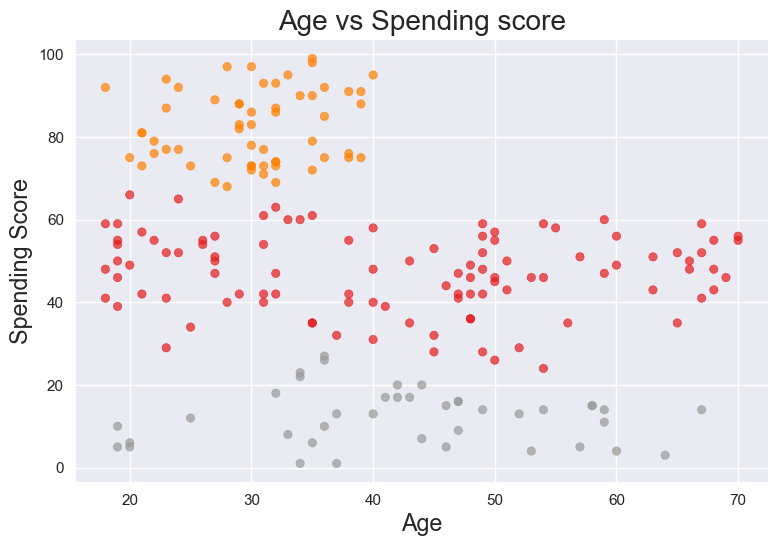

In [182]:
sns.set_style("darkgrid")

plt.scatter(X1["Age"],
            X1["Spending Score (1-100)"],
            c=model.labels_,
            cmap="Set1",
            alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending score')


#### Annual Income and Spending Score- x2

In [145]:
X2.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'clusters'], dtype='object')

Text(0.5, 1.0, 'Annual Income vs Spending score')

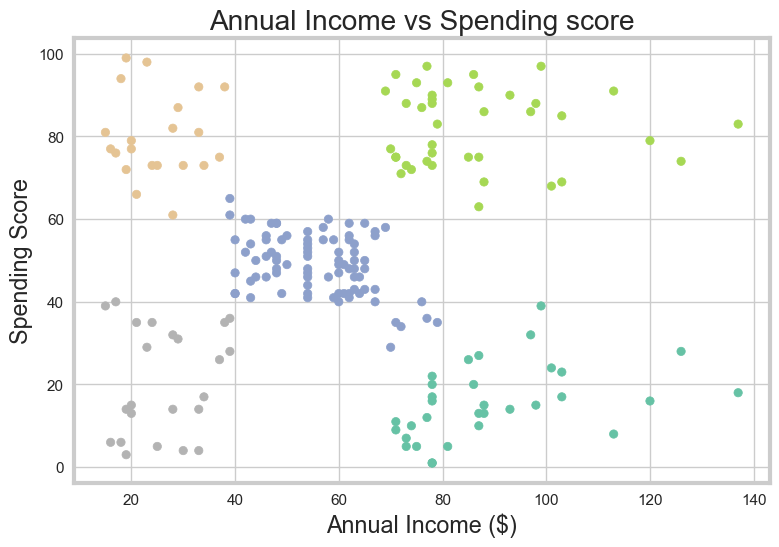

In [185]:
sns.set_style("whitegrid")
plt.scatter(data=X2, x="Annual Income (k$)", y="Spending Score (1-100)", c='clusters', cmap='Set2')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Spending score')

In [147]:
X2.clusters.value_counts()

clusters
1    85
2    39
0    32
4    23
3    21
Name: count, dtype: int64

#### Interpretation based on Age and Spending Score- x1

### It seems, there is no relationship between Age and Spending score, as the age increases, the spending doesn't necessarily increases.

We have seen there is a big difference in spending between Male and Female, and we think, it is affecting the results, and we cannot determine any relationship between the varibales

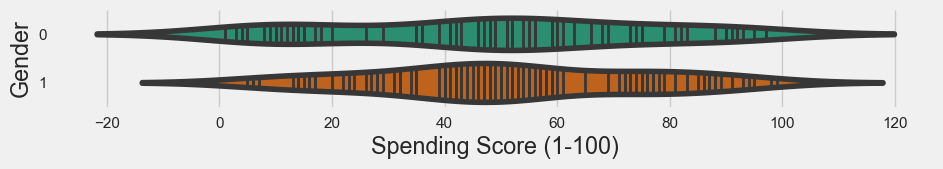

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def horizontal_violin_plot(df, value_colname, facet_colname, figscale=0.1, palette_name='Dark2', **kwargs):
    figsize = (1.2 * figscale * len(df[facet_colname].unique()), 12 * figscale)
    plt.figure(figsize=figsize)
    sns.violinplot(data=df, x=facet_colname, y=value_colname, palette=palette_name, orient='h', **kwargs)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.show()

# Replace _df_35 with your DataFrame
horizontal_violin_plot(df, 'Gender','Spending Score (1-100)' , palette_name='Dark2', inner='stick')


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## There is no relationship between the 2 variables

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___